In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import csv
import os
import re

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
import json
import ast

# Studying the movies dataset

In [80]:
data_folder = '../Data/MovieSummaries/'
# Load movie metadata
column_names = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'movie_name', 'movie_year', 'movie_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres']
tsv_file_movie = data_folder + 'movie.metadata.tsv'
df_movies = pd.read_table(tsv_file_movie, sep='\t', names=column_names)

In [81]:
df_movies

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_year,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [82]:
def convert_string_to_dict(dict_str):
    """
    Attempts to convert a string to a dictionary using json.loads.
    If it fails, tries ast.literal_eval.
    """
    try:
        # First, try using json.loads
        return json.loads(dict_str)
    except json.JSONDecodeError:
        try:
            # If json.loads fails, try ast.literal_eval
            return ast.literal_eval(dict_str)
        except (ValueError, SyntaxError) as e:
            # If both methods fail, return None or raise an exception
            print("Failed to convert string to dictionary:", e)
            return None

def map_codes_to_items(list_of_dicts):
    """
    Maps a list of dictionaries to a list of items.
    """
    
    map_codes_to_something= {}
    for d in list_of_dicts:
        for k, v in d.items():
            map_codes_to_something[k] = v
    map_codes_to_something['nan'] = None
    return map_codes_to_something
    

In [83]:
list_countries_codes = []
# for s in np.array(df_movies["movie_countries"].value_counts().keys()):
for s in np.array(df_movies["movie_countries"]):
    list_countries_codes.append(convert_string_to_dict(s))
list_countries = [tuple(sublist.values()) for sublist in list_countries_codes]

list_languages_codes = []
# for s in np.array(df_movies["movie_languages"].value_counts().keys()):
for s in np.array(df_movies["movie_languages"]):
    list_languages_codes.append(convert_string_to_dict(s))
list_languages = [set(sublist.values()) for sublist in list_languages_codes]

list_genres_codes = []
# for s in np.array(df_movies["movie_genres"].value_counts().keys()):
for s in np.array(df_movies["movie_genres"]):
    list_genres_codes.append(convert_string_to_dict(s))
list_genres = [set(sublist.values()) for sublist in list_genres_codes]

In [84]:
# countries = pd.DataFrame(np.array(list_countries))
countries = [', '.join(map(str, t)) for t in list_countries]
df_movies["movie_countries"] = countries

languages = pd.DataFrame([', '.join(list_languages) if list_languages else None for list_languages in list_languages])
df_movies["movie_languages"] = languages

genres = pd.DataFrame([', '.join(genres) if genres else None for genres in list_genres])
df_movies["movie_genres"] = genres


In [85]:
df_movies

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_year,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Adventure, Thriller, Space western, Action, Sc..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Drama, Mystery, Crime Drama, Biographical film"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Drama, Crime Fiction"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Erotic thriller, Psychological thriller, Thriller"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland, United Kingdom","Drama, Documentary, Biographical film"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire, Comedy"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Anime, Short Film, Adventure, Drama, Animation..."


### Studying the movie release dates
1. What is the distribution like for movie years?
2. What is the distribution like for movie dates? What months do films tend to get released?
3. What is the distribution of genres across years?


The fraction of known movie years: 0.913
The fraction of known movie dates (year/month/day): 0.522


<Axes: title={'center': 'Movies by year'}, xlabel='Year', ylabel='Number of movies'>

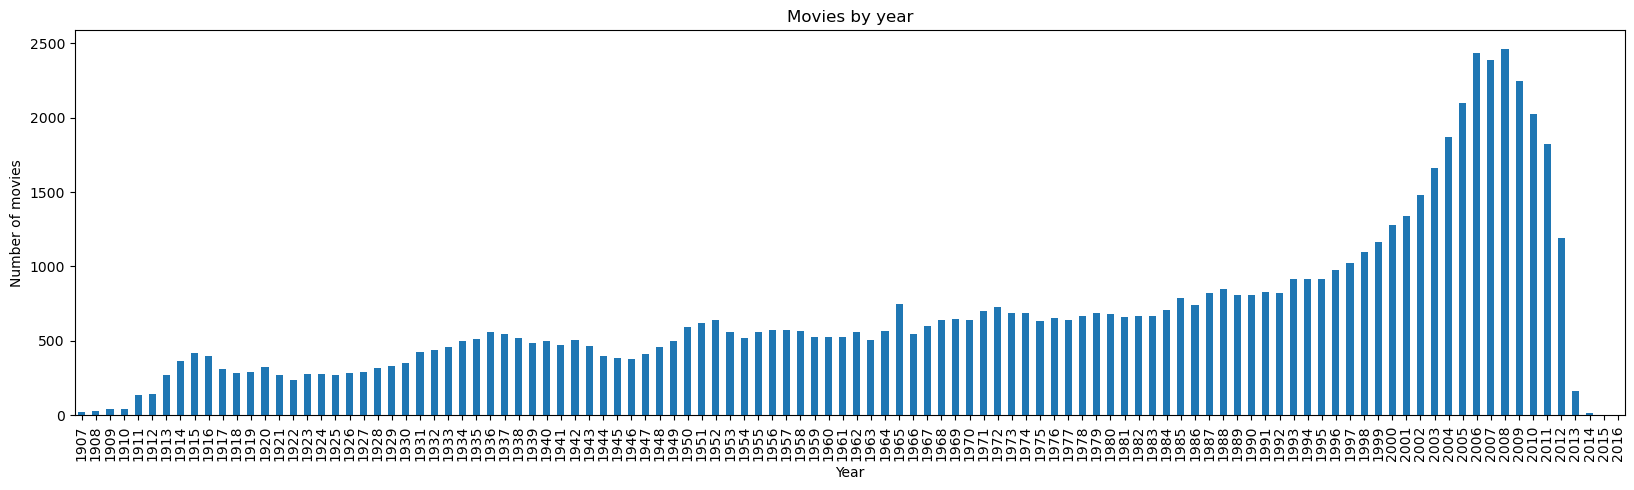

In [ ]:
# TODO: clean the typo_bound for Actor DOB

def get_movie_year(movie_year, lower_bound=1906, upper_bound=2025, typo_bound=1025):
    if type(movie_year) == str:
        new_movie_year = movie_year.split("-")[0]
        if int(new_movie_year) > lower_bound and int(new_movie_year) < upper_bound:
            return new_movie_year
        elif int(new_movie_year) < typo_bound and int(new_movie_year) > 1000:
            return str(int(new_movie_year) + 1000)
        else:
            return None
    else:
        return None

def get_movies_with_dates(movie_date):
    if type(movie_date) == str:
        if len(movie_date) > 4:
            return movie_date
        
movie_years_only = df_movies["movie_year"].apply(lambda x: get_movie_year(x, lower_bound=1906, upper_bound=2025))
print(f"The fraction of known movie years: {round(len(movie_years_only.dropna())/len(movie_years_only),3)}")

movie_dates = df_movies["movie_year"].apply(get_movies_with_dates)
print(f"The fraction of known movie dates (year/month/day): {round(len(movie_dates.dropna())/len(movie_dates),3)}")

movie_years_only.dropna().value_counts().sort_index().plot(kind='bar', figsize=(20,5), title='Movies by year', xlabel='Year', ylabel='Number of movies')
# df_movie_years_only = pd.DataFrame(movie_years_only.dropna().astype(int).value_counts(), columns=["count"]).reset_index()
# plt.figure(figsize=(20, 5))
# sns.barplot(x="movie_year", y="count", data=df_movie_years_only)
# plt.xticks(rotation=90)
# plt.xlim(0, len(df_movie_years_only))
# plt.xlabel("Movie year")
# plt.ylabel("Number of movies")
# plt.title("Distribution of movie years")
# plt.tight_layout()
# plt.show()

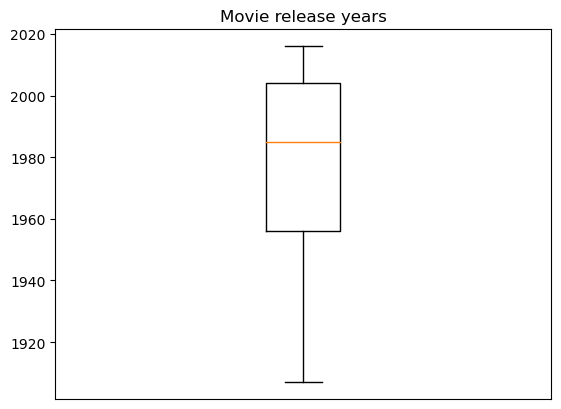

mean      1977.752919
median    1985.000000
std         28.570287
Name: movie_year, dtype: float64

In [222]:
plt.boxplot(movie_years_only.dropna().astype(int))
plt.xticks([])
plt.title('Movie release years')
plt.show()

movie_years_only.dropna().astype(int).aggregate(["mean", "median", "std"])

<Axes: title={'center': 'Movies by month'}, xlabel='Month', ylabel='Number of movies'>

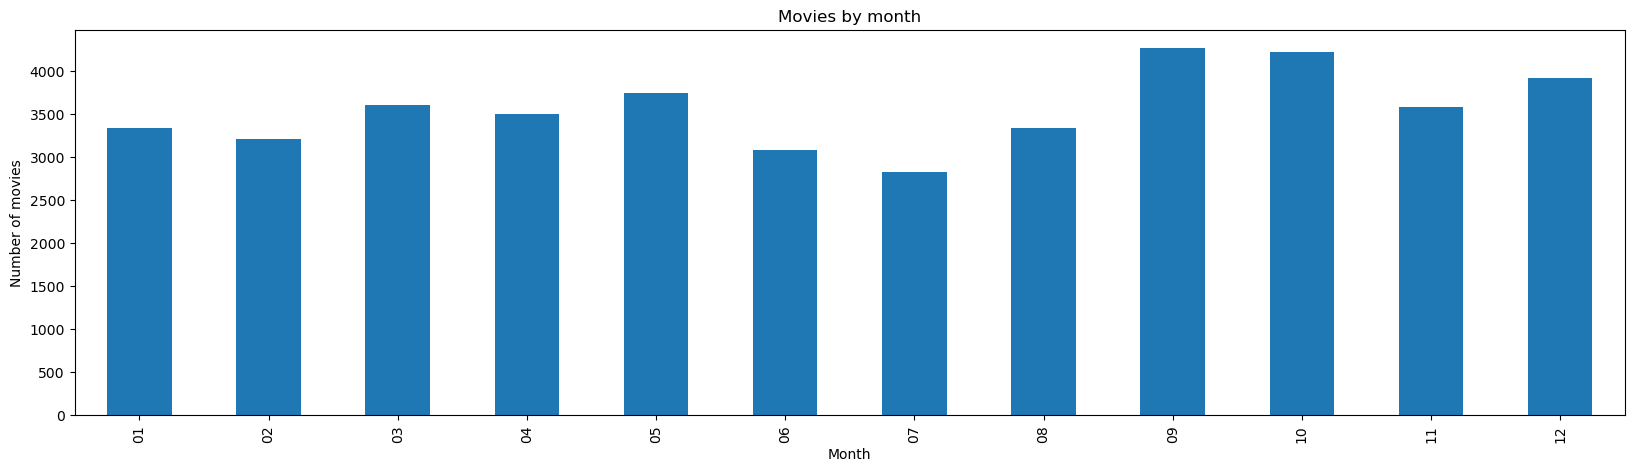

In [223]:
def get_month(movie_date):
    if type(movie_date) == str:
        if len(movie_date) > 4:
            return movie_date.split("-")[1]
        else:
            return None
    else:
        return None
movie_dates.dropna().apply(get_month).value_counts().sort_index().plot(kind='bar', figsize=(20,5), title='Movies by month', xlabel='Month', ylabel='Number of movies')

### Movie runtimes

In [224]:
print(f'The fraction of known movie runtimes: {round(len(df_movies["movie_runtime"].dropna())/len(df_movies["movie_runtime"]),3)}')

The fraction of known movie runtimes: 0.75


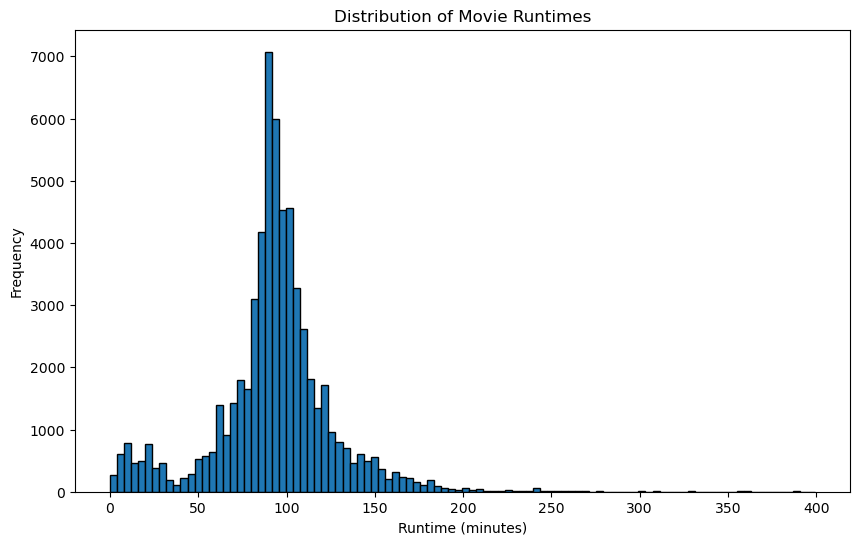

count    61225.000000
mean        92.836035
std         34.406651
min          0.000000
25%         81.000000
50%         93.000000
75%        106.000000
max        399.000000
Name: movie_runtime, dtype: float64

In [225]:
# Filter the DataFrame to exclude outliers
# Calculate Q1 and Q3
# Q1 = df_movies["movie_runtime"].dropna().astype(int).quantile(0.25)
# Q3 = df_movies["movie_runtime"].dropna().astype(int).quantile(0.75)
# IQR = Q3 - Q1

# Define lower and upper bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

movie_runtimes = df_movies["movie_runtime"][(df_movies["movie_runtime"]>= 0) & (df_movies["movie_runtime"] <= 400)].dropna().astype(float)

plt.figure(figsize=(10, 6))
plt.hist(movie_runtimes, bins=100, edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

movie_runtimes.describe()

### Movie revenues

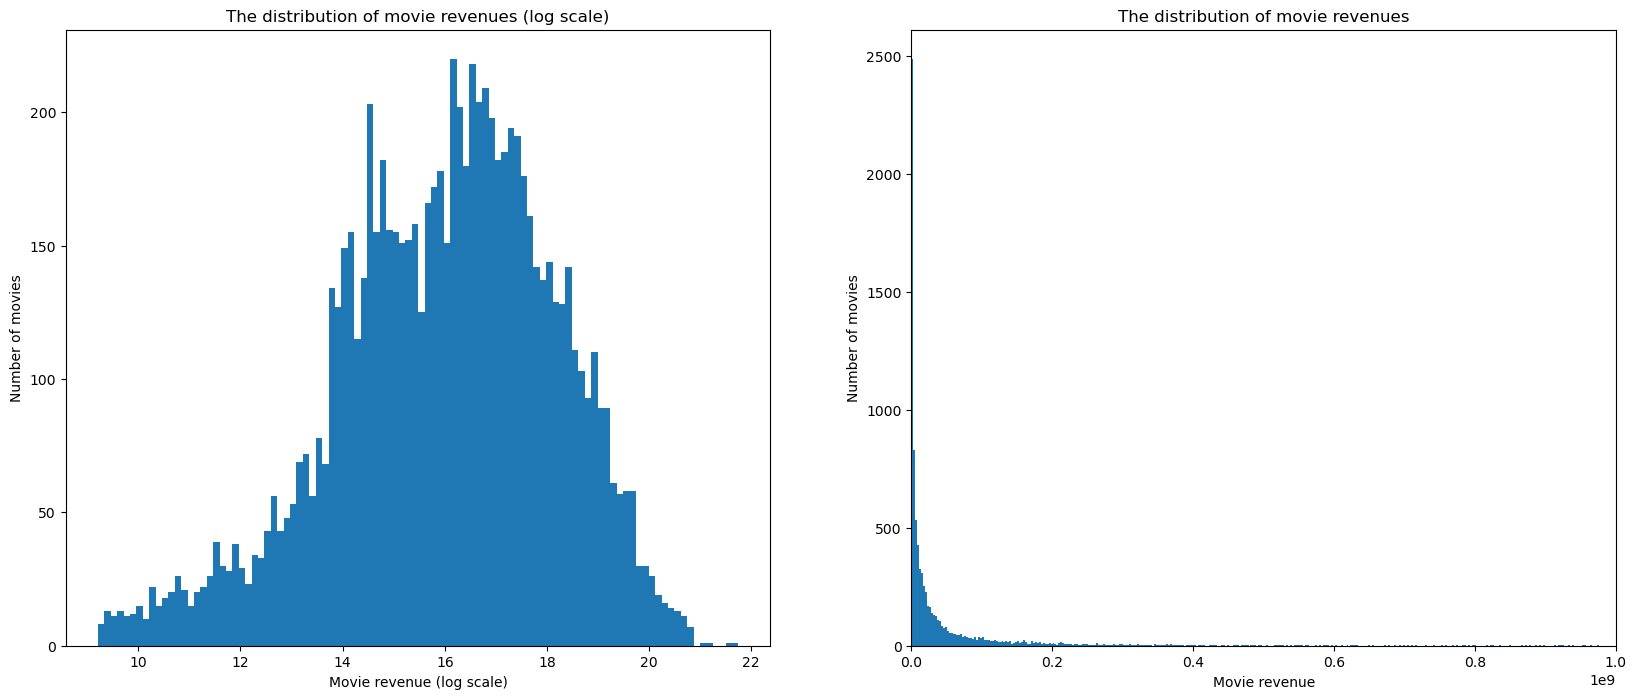

In [226]:
movie_revenues = df_movies["movie_revenue"].dropna().astype(int)
#movie_revenues.hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].set_xlabel('Movie revenue (log scale)')
ax[0].set_ylabel('Number of movies')
ax[0].set_title('The distribution of movie revenues (log scale)')
ax[0].hist(movie_revenues.apply(lambda x: math.log(x) if x > 0 else 0), bins = 100)

ax[1].set_xlabel('Movie revenue')
ax[1].set_ylabel('Number of movies')
ax[1].set_title('The distribution of movie revenues')
ax[1].hist(movie_revenues, bins = 1000)
ax[1].set_xlim(0, 1e9)

plt.show()

### Languages

In [227]:
list_languages_one = pd.DataFrame([each for sublist in list_languages_codes for each in sublist.values()], columns = ['language'])
language_counts = list_languages_one['language'].value_counts()
list_languages_one['language'] = list_languages_one['language'].apply(lambda x: x if language_counts[x] >= 600 else 'Other')
# list_languages_one['language'].value_counts()

The proportion of movies for which languages are known: 0.83036664586927


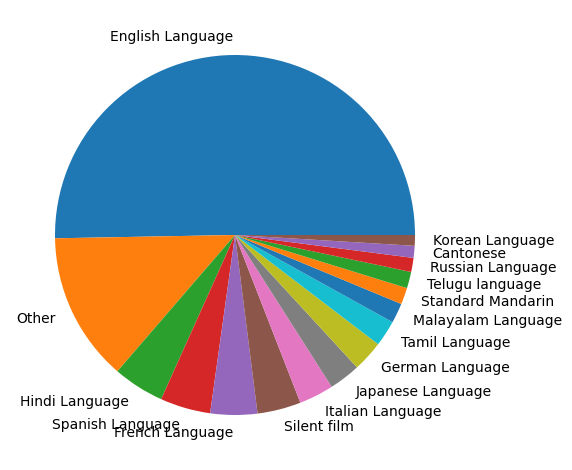

In [228]:
print(f'The proportion of movies for which languages are known: {len(df_movies["movie_languages"].dropna().astype(str).apply(lambda x: x.strip()))/len(df_movies["movie_languages"])}')

fig, ax = plt.subplots()
ax.pie(list_languages_one['language'].value_counts().values, labels=list_languages_one['language'].value_counts().keys())
plt.tight_layout()
plt.show()

### Countries

In [229]:
list_countries_one = pd.DataFrame([each for sublist in list_countries_codes for each in sublist.values()], columns = ['country'])
countries_counts = list_countries_one['country'].value_counts()
list_countries_one['country'] = list_countries_one['country'].apply(lambda x: x if countries_counts[x] >= 700 else None)
list_countries_one['country'].value_counts()

country
United States of America    34408
India                        8411
United Kingdom               7868
France                       4395
Italy                        3163
Japan                        2647
Canada                       2534
Germany                      2393
Argentina                    1468
Hong Kong                    1240
Spain                        1136
Australia                    1114
South Korea                   887
Mexico                        870
Netherlands                   840
Name: count, dtype: int64

The proportion of movies for which countries are known: 1.0


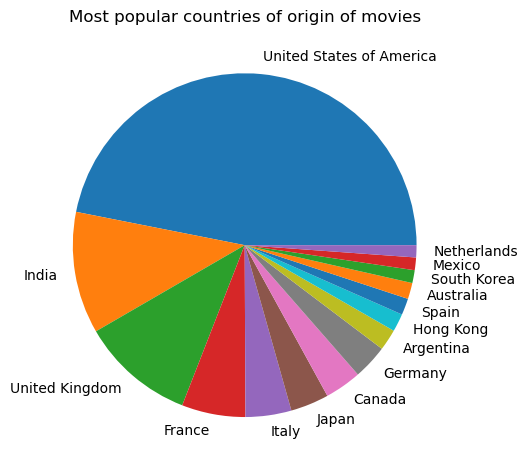

In [230]:
print(f'The proportion of movies for which countries are known: {len(df_movies["movie_countries"].dropna().astype(str).apply(lambda x: x.strip()))/len(df_movies["movie_countries"])}')

fig, ax = plt.subplots()
ax.pie(list_countries_one['country'].value_counts().values, labels=list_countries_one['country'].value_counts().keys())
ax.set_title('Most popular countries of origin of movies')
plt.tight_layout()
plt.show()

### Genres
1. Pie chart of all the languages present

In [231]:
list_genres_one = pd.DataFrame([each for sublist in list_genres_codes for each in sublist.values()], columns = ['genre'])
genres_counts = list_genres_one['genre'].value_counts()
list_genres_one['genre'] = list_genres_one['genre'].apply(lambda x: x if genres_counts[x] >= 2500 else None)
list_genres_one['genre'].value_counts()

genre
Drama               34007
Comedy              16349
Romance Film        10234
Black-and-white      9094
Action               8798
Thriller             8744
Short Film           8141
World cinema         7155
Crime Fiction        6948
Indie                6897
Documentary          5630
Horror               5280
Silent film          5250
Adventure            4963
Family Film          4598
Action/Adventure     4561
Comedy film          4362
Musical              4160
Animation            3534
Romantic drama       3372
Mystery              3195
Science Fiction      3052
Fantasy              2820
Romantic comedy      2680
War film             2652
Name: count, dtype: int64

The proportion of movies for which genres are known: 0.9719357482780979


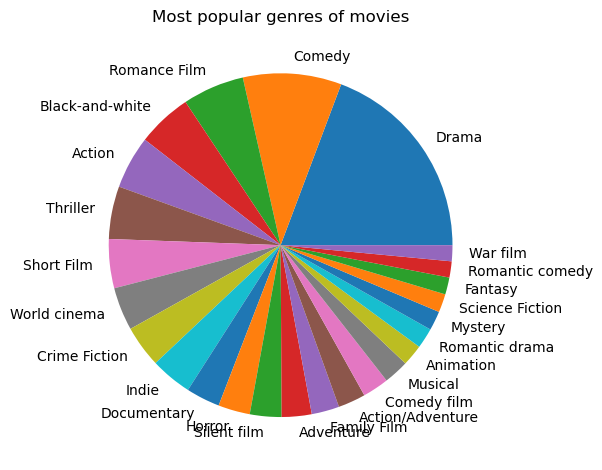

In [232]:
print(f'The proportion of movies for which genres are known: {len(df_movies["movie_genres"].dropna().astype(str).apply(lambda x: x.strip()))/len(df_movies["movie_genres"])}')

fig, ax = plt.subplots()
ax.pie(list_genres_one['genre'].value_counts().values, labels=list_genres_one['genre'].value_counts().keys())
ax.set_title('Most popular genres of movies')
plt.tight_layout()
plt.show()

# The charachter dataset

In [233]:
# Load charachter metadata
column_names_char = ['Wikipedia_movie_ID', 'Freebase_movie', 'movie_release_date', 'character_name', 'actor_DOB', 'gender', 'height', 'ethnicity', 'actor_name', 'actor_age', 'freebase_map', '1','2']
tsv_file_char = data_folder + 'character.metadata.tsv'
df_chars = pd.read_table(tsv_file_char, sep='\t', names=column_names_char)

In [234]:
df_chars

,Wikipedia_movie_ID,Freebase_movie,movie_release_date,character_name,actor_DOB,gender,height,ethnicity,actor_name,actor_age,freebase_map,1,2
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


The fraction of known DOB of actors: 0.657
The fraction of known DOB of actors (year/month/day): 0.734


<Axes: title={'center': 'Movies by year'}, xlabel='Year', ylabel='Number of movies'>

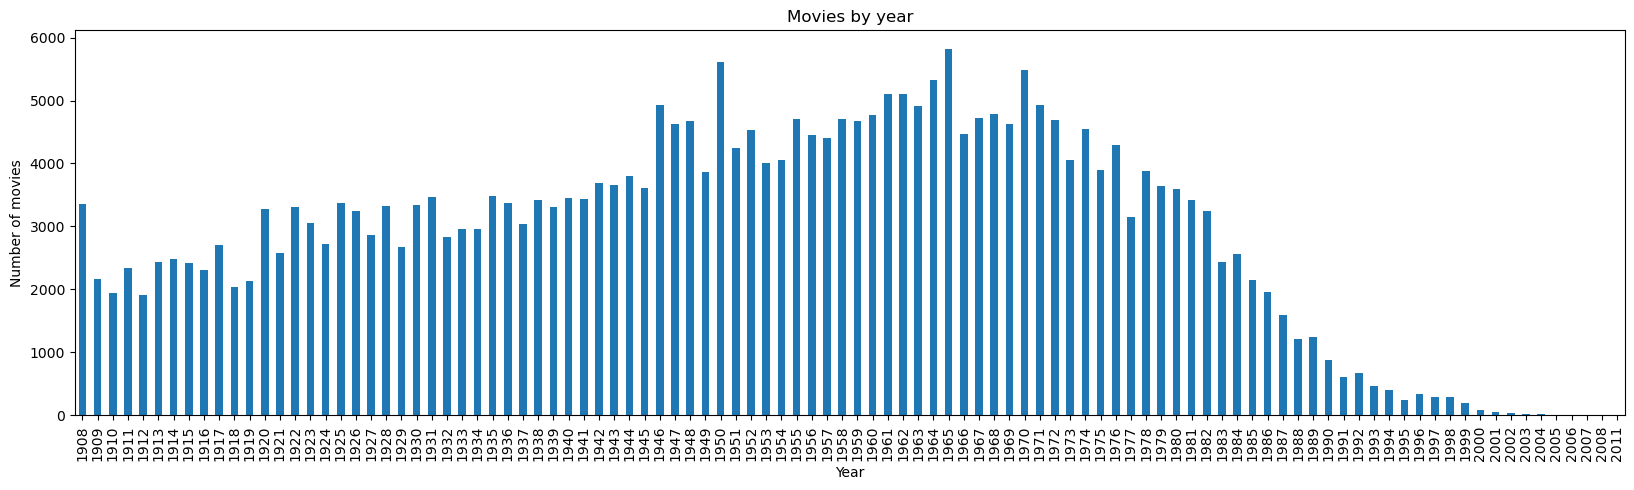

In [235]:
actor_birth_only = df_chars["actor_DOB"].apply(lambda x: get_movie_year(x, lower_bound=1907, upper_bound=2025))
print(f"The fraction of known DOB of actors: {round(len(actor_birth_only.dropna())/len(actor_birth_only),3)}")

actor_birth_date = df_chars["actor_DOB"].apply(get_movies_with_dates)
print(f"The fraction of known DOB of actors (year/month/day): {round(len(actor_birth_date.dropna())/len(actor_birth_date),3)}")

actor_birth_only.dropna().value_counts().sort_index().plot(kind='bar', figsize=(20,5), title='Movies by year', xlabel='Year', ylabel='Number of movies')
# df_movie_years_only = pd.DataFrame(movie_years_only.dropna().astype(int).value_counts(), columns=["count"]).reset_index()
# plt.figure(figsize=(20, 5))
# sns.barplot(x="movie_year", y="count", data=df_movie_years_only)
# plt.xticks(rotation=90)
# plt.xlim(0, len(df_movie_years_only))
# plt.xlabel("Movie year")
# plt.ylabel("Number of movies")
# plt.title("Distribution of movie years")
# plt.tight_layout()
# plt.show()

# Remake data

In [4]:
remakes_df = pd.read_csv('../data/remake/remakes.csv')

In [14]:
remakes_df.head(5)

,original,original_year,original_url,remake,remake_year,remake_url
0,12 Angry Men,1957,/wiki/12_Angry_Men_(1957_film),12 Angry Men (1997),1997,NaN
1,13 Assassins,1963,/wiki/13_Assassins_(1963_film),13 Assassins,2010,/wiki/13_Assassins_(2010_film)
2,13 Ghosts,1960,/wiki/13_Ghosts,Thirteen Ghosts,2001,/wiki/Thirteen_Ghosts
3,13 Tzameti,2005,/wiki/13_Tzameti,13,2010,/wiki/13_(2010_film)
4,3 Idiots,2009,/wiki/3_Idiots,Nanban,2012,/wiki/Nanban_(2012_film)


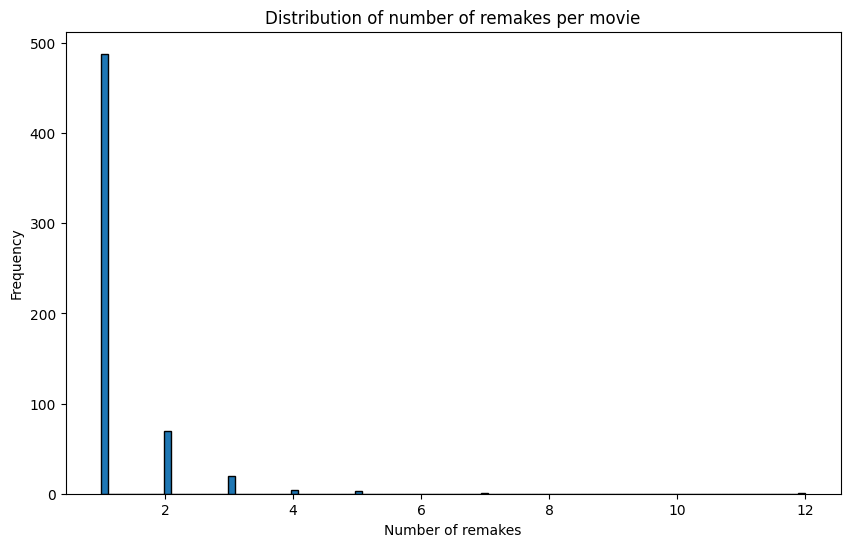

In [15]:
# histogram of the number of remakes per movie

remakes_count = remakes_df[["original", "remake"]].groupby("original").agg("count")

plt.figure(figsize=(10, 6))
plt.hist(remakes_count, bins=100, edgecolor='black')
plt.title('Distribution of number of remakes per movie')
plt.xlabel('Number of remakes')
plt.ylabel('Frequency')
plt.show()

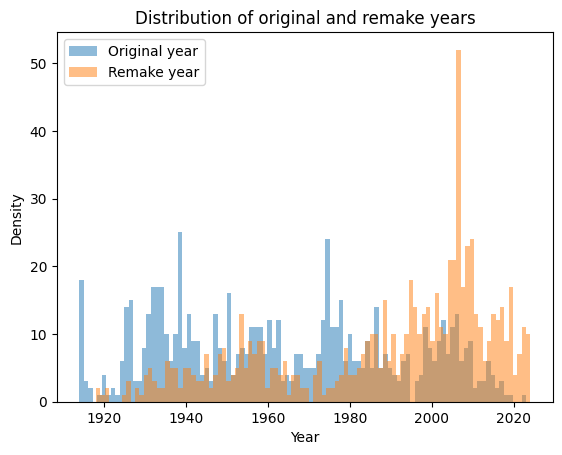

In [20]:
# distriution of original year and remake year

plt.hist(remakes_df["original_year"], bins=100, alpha=0.5, label='Original year')
plt.hist(remakes_df["remake_year"], bins=100, alpha=0.5, label='Remake year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Distribution of original and remake years')
plt.legend()

Text(0.5, 1.0, 'Distribution of time between original and remake')

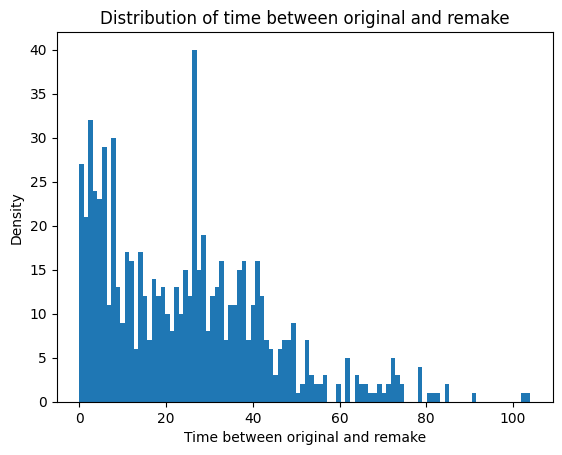

In [21]:
# plot time between original and remake

remakes_df["time_between"] = remakes_df["remake_year"] - remakes_df["original_year"]

plt.hist(remakes_df["time_between"], bins=100)
plt.xlabel('Time between original and remake')
plt.ylabel('Density')
plt.title('Distribution of time between original and remake')